In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc, rcParams

# Define functions to estimate potential loss of the electrolyzers

## This function is to calucalate the total potential loss except cathode potential

In [2]:
def estEother(i):
    #VARIABLES AND CONSTANTS
    alpha=0.6 #https://pubs-rsc-org.tudelft.idm.oclc.org/en/content/articlelanding/2020/ee/d0ee00673d ?
    T=298.15 #Temperature at normal conditions
    R=8.314 #Gas constant
    U=1.23 #Thermodynamic equilibrium potential, V
    pHamine=9 #pH value of 30wt% monoethanolamine solution loaded with about 40-60% CO2
    #c_ohamine=10**(-14+pHamine)
    pHanolyte=14 #pH value of the anolyte, we assumed the anolyte will be 1M KOH aqueous solution
    #c_ohanolyte=10**(-14+pHanolyte)
    A=1.23e-4 #mA cm-2 #pre-exponential factor
    Ea=(11+1*14)*1000 #kJ/mol pH=14
    F=96485 #Faraday constant, sA/mol
    io=0.01 #Exchange current, mA cm-2 
    
    #condc=37 # 30wt% monoethanolamine aqueous solution ionic conductivity loaded with CO2, mS/cm 
    condc = 215 #assuming 30wt% monoethanolamine aqueous solution with salts has the same ionic conductivity loaded with CO2, mS/cm 
    cond_nafion=8 #Nafion 115 membrane ionic conductivity, S/m
    conda=0.2153 #1M KOH aqueous electrolyte ionic conductivity, S/cm
    
    anolytegap=1 #gap between anode and membrane for anolyte to flow through, mm
    catholytegap=3 #gap between cathode and membrane for capture media to flow through, mm
    
    #POTENTIAL LOSSES CALCULATION
    Eoer=U+R*T/(alpha)/F*np.log(i/io) #Anode overpotential, V
    Ememb=i/cond_nafion*115e-6/1000  #Ohmic loss due to ion conduction in the membrane
    Eanolyte=i/conda*anolytegap/10/1000  #Ohmic loss from the anolyte
    Ecatholyte = i/condc*catholytegap/10*1000/1000 #Ohmic loss from the capture media
#https://www.researchgate.net/post/Why-is-KOH-solution-used-as-the-electrolyte-for-supercapacitor-testing-of-carbon-electrodes
    Eother=Eoer+Ememb+Eanolyte+Ecatholyte #Total potential loss except cathode potential
    
    
    return Eother

## This function is to estimate potentials separately except cathode potential

In [3]:
def estE(i):
    #VARIABLES AND CONSTANTS
    alpha=0.6 #Charge-transfer coefficient for the anode reaction
    T=298.15 #Temperature at normal conditions
    R=8.314 #Gas constant
    U=1.23 #Thermodynamic equilibrium potential, V
    pHamine=9 #pH value of 30wt% monoethanolamine solution loaded with about 40-60% CO2
    #c_ohamine=10**(-14+pHamine)#concentration of hydroxide ions in the amine 
    pHanolyte=14 #pH value of the anolyte, we assumed the anolyte will be 1M KOH aqueous solution
    #c_ohanolyte=10**(-14+pHanolyte) #concentration of hydroxide ions in the anolyte
    A=1.23e-4 #mA cm-2 #pre-exponential factor
    F=96485 #Faraday constant, sA/mol
    #io=A*np.exp(-Ea/R/T)
    io=0.01 #Exchange current, mA cm-2 
    conda=0.2153 #1M KOH aqueous electrolyte ionic conductivity, S/cm 
    condc=37 # 30wt% monoethanolamine aqueous solution ionic conductivity loaded with CO2, mS/cm 
    cond_nafion=8 #Nafion 115 membrane ionic conductivity, S/m   
    anolytegap=1 #gap between anode and membrane for anolyte to flow through, mm
    catholytegap=3 #gap between cathode and membrane for capture media to flow through, mm
    
    #POTENTIAL LOSSES CALCULATION
    Eoer=U+R*T/(alpha)/F*np.log(i/io) #Anode overpotential, V
    Ememb=i/cond_nafion*115e-6/1000 #Ohmic loss due to ion conduction in the membrane
    Eanolyte=i/conda*anolytegap/10/1000 #Ohmic loss from the anolyte
    Ecatholyte = i/condc*catholytegap/10*1000/1000 #Ohmic loss from the capture media
    #Enerstian=R*T/F*np.log(c_ohamine/c_ohanolyte)
#https://www.researchgate.net/post/Why-is-KOH-solution-used-as-the-electrolyte-for-supercapacitor-testing-of-carbon-electrodes
    #Eother=Eoer+Ememb+Eanolyte+Ecatholyte
    
    #RETURN THE RESULTS
    return Eoer, Ememb, Eanolyte, Ecatholyte


## The below function is to estimate the potential losses except cathode overpotential if the amine solution has inorganic salts to improve ion conductivity

In [4]:
def estEwithsalts(i):
    #VARIABLES AND CONSTANTS
    alpha=0.6 #Charge-transfer coefficient for the anode reaction
    T=298.15 #Temperature at normal conditions
    R=8.314 #Gas constant
    U=1.23 #Thermodynamic equilibrium potential, V
    pHamine=9 #pH value of 30wt% monoethanolamine solution loaded with about 40-60% CO2
    #c_ohamine=10**(-14+pHamine)#concentration of hydroxide ions in the amine 
    pHanolyte=14 #pH value of the anolyte, we assumed the anolyte will be 1M KOH aqueous solution
    #c_ohanolyte=10**(-14+pHanolyte) #concentration of hydroxide ions in the anolyte
    A=1.23e-4 #mA cm-2 #pre-exponential factor
    F=96485 #Faraday constant, sA/mol
    #io=A*np.exp(-Ea/R/T)
    io=0.01 #Exchange current, mA cm-2 
    conda=0.2153 #1M KOH aqueous electrolyte ionic conductivity, S/cm 
    condc=215 # assuming 30wt% monoethanolamine aqueous solution with salts has the same ionic conductivity loaded with CO2, mS/cm 
    cond_nafion=8 #Nafion 115 membrane ionic conductivity, S/m   
    anolytegap=1 #gap between anode and membrane for anolyte to flow through, mm
    catholytegap=3 #gap between cathode and membrane for capture media to flow through, mm
    
    #POTENTIAL LOSSES CALCULATION
    Eoer=U+R*T/(alpha)/F*np.log(i/io) #Anode overpotential, V
    Ememb=i/cond_nafion*115e-6/1000 #Ohmic loss due to ion conduction in the membrane
    Eanolyte=i/conda*anolytegap/10/1000 #Ohmic loss from the anolyte
    Ecatholyte = i/condc*catholytegap/10*1000/1000 #Ohmic loss from the capture media
    #Enerstian=R*T/F*np.log(c_ohamine/c_ohanolyte)
#https://www.researchgate.net/post/Why-is-KOH-solution-used-as-the-electrolyte-for-supercapacitor-testing-of-carbon-electrodes
    #Eother=Eoer+Ememb+Eanolyte+Ecatholyte
    
    #RETURN THE RESULTS
    return Eoer, Ememb, Eanolyte, Ecatholyte

## Fig. S2a

/var/folders/c6/8vm3n_sj1k1cnflzwzcmx78c0000gn/T/ipykernel_47659/3859472094.py:24: RuntimeWarning: invalid value encountered in log
  Eoer=U+R*T/(alpha)/F*np.log(i/io) #Anode overpotential, V


Text(0, 0.5, 'Potential (V)')

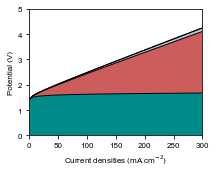

In [8]:
plt.rcParams['font.family']='Arial' #set font to be Arial
plt.rcParams['font.size']=8 #set font size to be 8
fig=plt.gcf()
fig.set_size_inches((2.33*4/3, 2.33)) #set figure size
ax= fig.add_subplot(111)
current=np.arange(-4, 305, 5) #define current densities from 1 to 300 mA cm-2
Eoer, Ememb, Eanolyte, Ecatholyte=estE(current) #calculate the potential losses

plt.plot(current, Eoer, 'k', lw=1) #plot the anode potential loss
plt.plot(current, Ecatholyte+Eoer, 'k', lw=1) #plot ohmic loss from capture media
plt.plot(current, Eanolyte+Ecatholyte+Eoer, 'k', lw=1) #plot ohmic loss from anolyte
plt.plot(current, Ecatholyte+Eanolyte+Ememb+Eoer, 'k', lw=1) #plot ohmic loss from membrane

#Fill different colors to highlight the potential contributions
plt.fill_between(current, Eoer, 0, facecolor='darkcyan')
plt.fill_between(current, Eoer+Ecatholyte, Eoer, facecolor='indianred')
plt.fill_between(current, Eoer+Ecatholyte, Eoer+Ecatholyte, facecolor='r')
plt.fill_between(current, Eanolyte+Ecatholyte+Eoer, Eoer+Ecatholyte, facecolor='lightsteelblue')
plt.fill_between(current, Ecatholyte+Eanolyte+Ememb+Eoer, Eanolyte+Ecatholyte+Eoer, facecolor='firebrick')

plt.xlim(0,300) #set x-axis limits
plt.ylim(0,5) #set y-axis limits

plt.xlabel('Current densities (mA cm$^{-2}$)') #set xlabel
plt.ylabel('Potential (V)') #set ylabel
#fig.savefig('Figure/potentials breakup.eps', bbox_inches='tight', pad_inches=0, transparent=True)

## Fig. S2b

C:\Users\LOCALA~1\AppData\Local\Temp/ipykernel_25100/3972139057.py:24: RuntimeWarning: invalid value encountered in log
  Eoer=U+R*T/(alpha)/F*np.log(i/io) #Anode overpotential, V


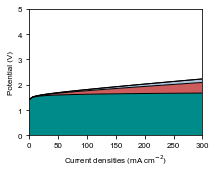

In [6]:
#Assuming the amine solution with salts has the same conductivity to 1 M KOH aq solution.
plt.rcParams['font.family']='Arial' #set font to be Arial
plt.rcParams['font.size']=8 #set font size to be 8
fig=plt.gcf()
fig.set_size_inches((2.33*4/3, 2.33)) #set figure size
ax= fig.add_subplot(111)
current=np.arange(-4, 305, 5) #define current densities from 1 to 300 mA cm-2
Eoer, Ememb, Eanolyte, Ecatholyte=estEwithsalts(current) #calculate the potential losses

plt.plot(current, Eoer, 'k', lw=1) #plot the anode potential loss
plt.plot(current, Ecatholyte+Eoer, 'k', lw=1) #plot ohmic loss from capture media
plt.plot(current, Eanolyte+Ecatholyte+Eoer, 'k', lw=1) #plot ohmic loss from anolyte
plt.plot(current, Ecatholyte+Eanolyte+Ememb+Eoer, 'k', lw=1) #plot ohmic loss from membrane

#Fill different colors to highlight the potential contributions
plt.fill_between(current, Eoer, 0, facecolor='darkcyan')
plt.fill_between(current, Eoer+Ecatholyte, Eoer, facecolor='indianred')
plt.fill_between(current, Eoer+Ecatholyte, Eoer+Ecatholyte, facecolor='r')
plt.fill_between(current, Eanolyte+Ecatholyte+Eoer, Eoer+Ecatholyte, facecolor='lightsteelblue')
plt.fill_between(current, Ecatholyte+Eanolyte+Ememb+Eoer, Eanolyte+Ecatholyte+Eoer, facecolor='firebrick')

plt.xlim(0,300) #set x-axis limits
plt.ylim(0,5) #set y-axis limits

plt.xlabel('Current densities (mA cm$^{-2}$)') #set xlabel
plt.ylabel('Potential (V)') #set ylabel
#fig.savefig('Figure/potentials breakup with inorganic salts.eps', bbox_inches='tight', pad_inches=0, transparent=True)

# Fig. 2a

In [5]:
f=pd.read_excel('literature data.xlsx', sheet_name='Combine') #Read literature data of integrated electrolyzer in the excel spreadsheet
j_combine=f['Current densities'] #Read all the reported current densities of integrated electrolyzer, mA cm-2 
fe_combine=f['FE(%) of CO']/100 #Read all the reported Faradaic efficiencies of the integrated electrolyzer
Ec_combine=f['Cathode Potential (V)'] #Read reported cathode potential, V
Eother_combine=estEother(j_combine) #Calculate the total potential except cathode potential from current densities
E_combine=-Ec_combine+Eother_combine #Calculate the cell potential
Q_combine=np.dot(E_combine, 2*96485)/(fe_combine*1000) #Calculate the energy cost of the integrated electrolyzers

In [6]:
ff=pd.read_excel('literature data.xlsx', sheet_name='Separate') #Read literature data of gas-fed electrolyzer in the excel spreadsheet
z = 2 #Number of charge transfered to produce one molecule of product
F = 96485 # A mol-1 Faraday constant
j_s=ff['Current densities'] #Read all the reported current densities of gas-fed electrolyzer, mA cm-2 
E_s=ff['Calculated Cell Voltage (V) '] #Read all the reported cell potentials of the gas-fed electrolyzers
fe_s=ff['FE(%) of CO']/100 #Read all the reported Faradaic efficiencies of the gas-fed electrolyzer
Q_s=np.dot(E_s, z*F)/(fe_s*1000) #Calculate the energy cost of the gas-fed electrolyzers


In [7]:
FE=np.arange(0.01,1.01,0.01) # Set a range of CO FE
E=np.arange(1.23+0.104,8,(8-1.23-0.104)/100) #Set a range of cell potentials
FEFE, EE = np.meshgrid(FE, E) #build a mesh grid of CO FE and cell potentials
Q=EE*z*F/FEFE/1000 #Calculate the energy cost of the electrolyzer using the mesh grid, kJ/molCO2 converted.

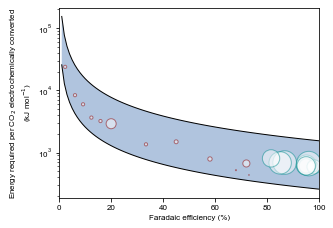

In [21]:
plt.rcParams['font.family']='Arial' #Set font to be Arial
plt.rcParams['font.size']=8 #Set fontsize to be 8
fig=plt.gcf()
fig.set_size_inches((2.33*4/3*1.5, 2.33*1.5)) #Set Figure size
ax= fig.add_subplot(111)

plt.plot(FE*100, Q.T[:,0],'k', lw=1) #Plot the lower limit
plt.plot(FE*100, Q.T[:,-1],'k',lw=1) #Plot the upper limit
#Highlight the region the electrolyzer will fall in.
plt.fill_between(FE*100, Q.T[:, 0], Q.T[:,-1], facecolor='lightsteelblue') 
#Plot the energy performance of the integrated electrolyzers
plt.scatter(fe_combine[:-1]*100, Q_combine[:-1], 
         s=j_combine[:-1].values, alpha=0.5,  facecolor='white', edgecolors='darkred') 
#Plot the energy performance of the gas-fed electrolyzers
plt.scatter(fe_s*100, Q_s, s=j_s.values,  facecolor='w', alpha=0.5, edgecolors='darkcyan')

plt.xlim(0,100) #Set xaxis limits

plt.xlabel('Faradaic efficiency (%)') #Set xlabel
plt.ylabel('Energy required per CO$_2$ electrochemically converted \n (kJ mol$^{-1}$)') #Set ylabel

plt.yscale('log') #Set y-axis in log scale.

#fig.savefig('Figure/co2 electrolysis comparison.png', bbox_inches='tight', dpi=1200, pad_inches=0, transparent=True) #Save the figure.